In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv('Hospital.csv')
data.drop(columns=[col for col in data.columns if 'unnamed' in col.lower()], inplace=True)

# Score by sources, getting in depth

In [224]:
data["Image"] = data['LLM'].apply(lambda x: True if 'ImageInput' in x else False)
df = data.copy()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Nuextract'),
  Text(1, 0, 'GPT'),
  Text(2, 0, 'Granite'),
  Text(3, 0, 'Gemini'),
  Text(4, 0, 'Qwen'),
  Text(5, 0, 'Llama'),
  Text(6, 0, 'GliNer')])

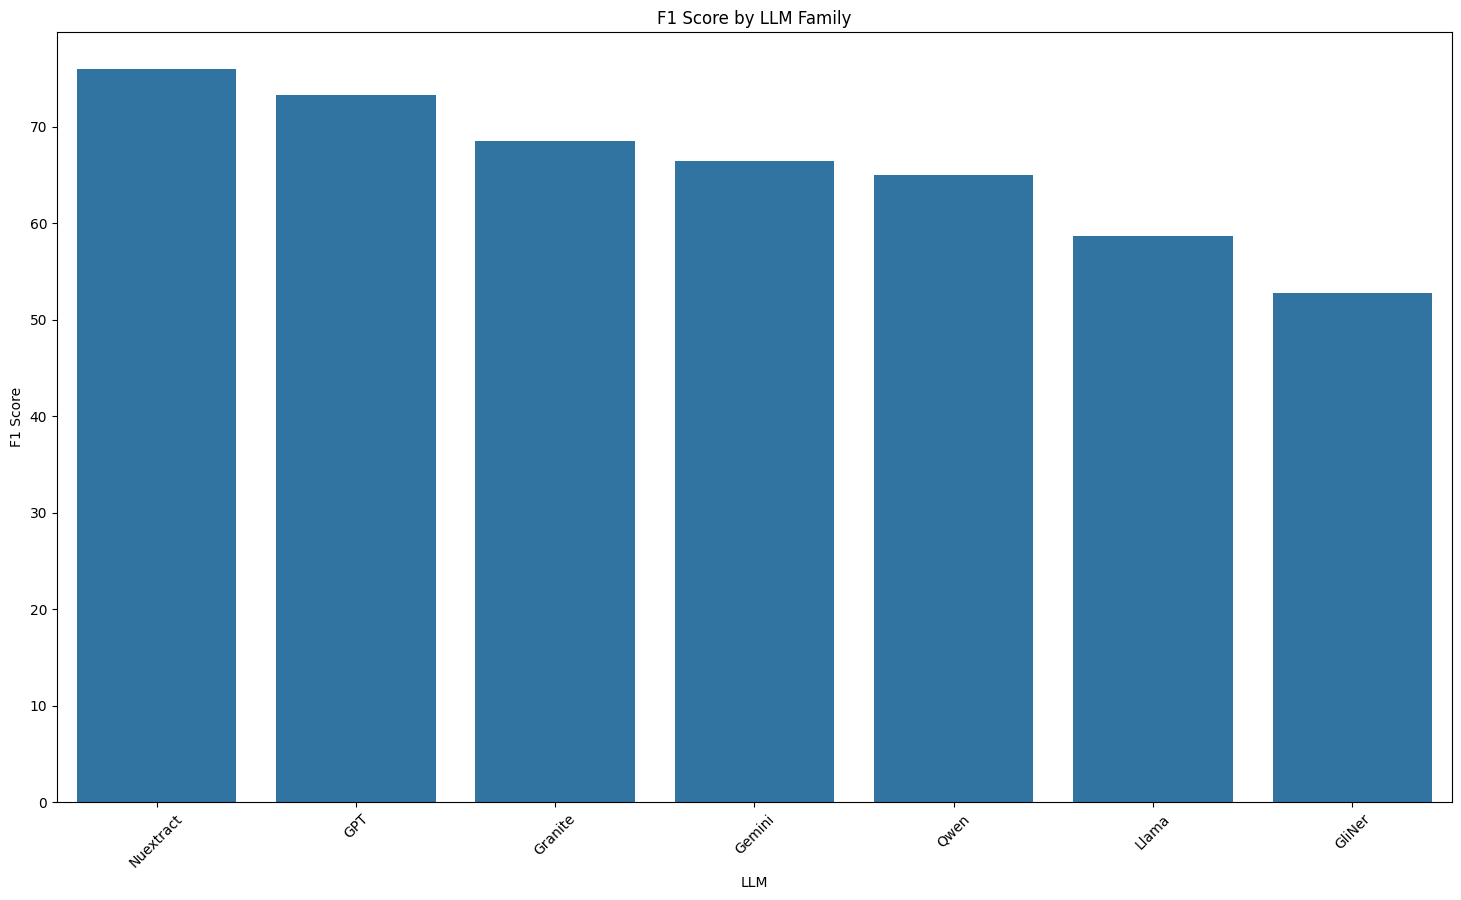

In [225]:
def family(name):
    if 'gpt' in name.lower():
        return 'GPT'
    elif 'llama' in name.lower():
        return 'Llama'
    elif 'gemma' in name.lower():
        return 'Gemini'
    elif 'nuextract' in name.lower():
        return 'Nuextract'
    elif 'granite' in name.lower():
        return 'Granite'
    elif 'qwen' in name.lower():
        return 'Qwen'
    else:
        return 'GliNer'

df['LLM'] = df['LLM'].apply(lambda x: x.replace('*ImageInput*', ""))
df['Family'] = df['LLM'].apply(lambda x: family(x))
d = df.groupby('Family').F1score.mean().sort_values(ascending=False)
plt.figure(figsize=(18, 10))
sns.barplot(x=d.index, y=d.values)
plt.title('F1 Score by LLM Family')
plt.xlabel('LLM')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)

#TODO how can i make that show the individual models average f1 within the bars

# Compare using the LTNER few-shot prompt or the normal prompt across all models

In [216]:
data.head()
df = data.groupby(['Prompt']).F1score.mean().sort_values(ascending=False)

[Text(0, 0, '70.2438'), Text(0, 0, '66.3437')]

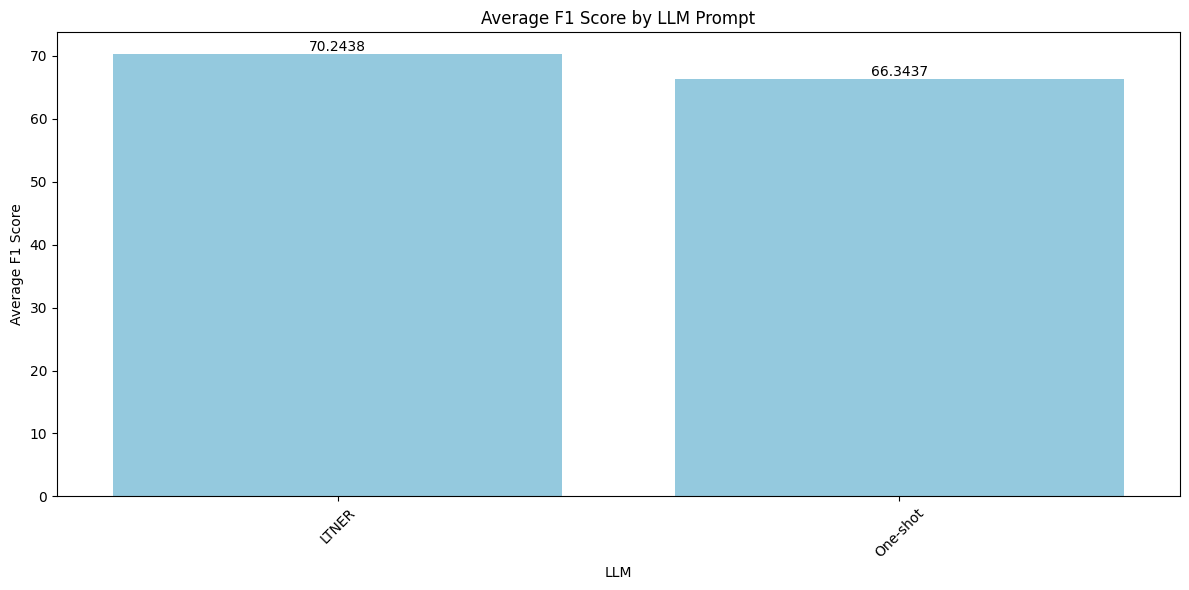

In [217]:

fig, axes = plt.subplots(figsize=(12, 6))
sns.barplot(x=['LTNER', 'One-shot'], y=df.values, color='skyblue', ax=axes)
plt.title('Average F1 Score by LLM Prompt')
plt.xlabel('LLM')
plt.ylabel('Average F1 Score')
plt.xticks(rotation=45)
plt.tight_layout()
axes.bar_label(axes.containers[0]) #type: ignore

# F1 scores for all LLM models with image vs text indicator

In [220]:
df = data.copy()
df['LLM'] = df['LLM'].apply(lambda x: x.replace('*ImageInput*', "*"))
inputType = df.groupby(['LLM', 'Image']).F1score.mean().sort_values(ascending=False)

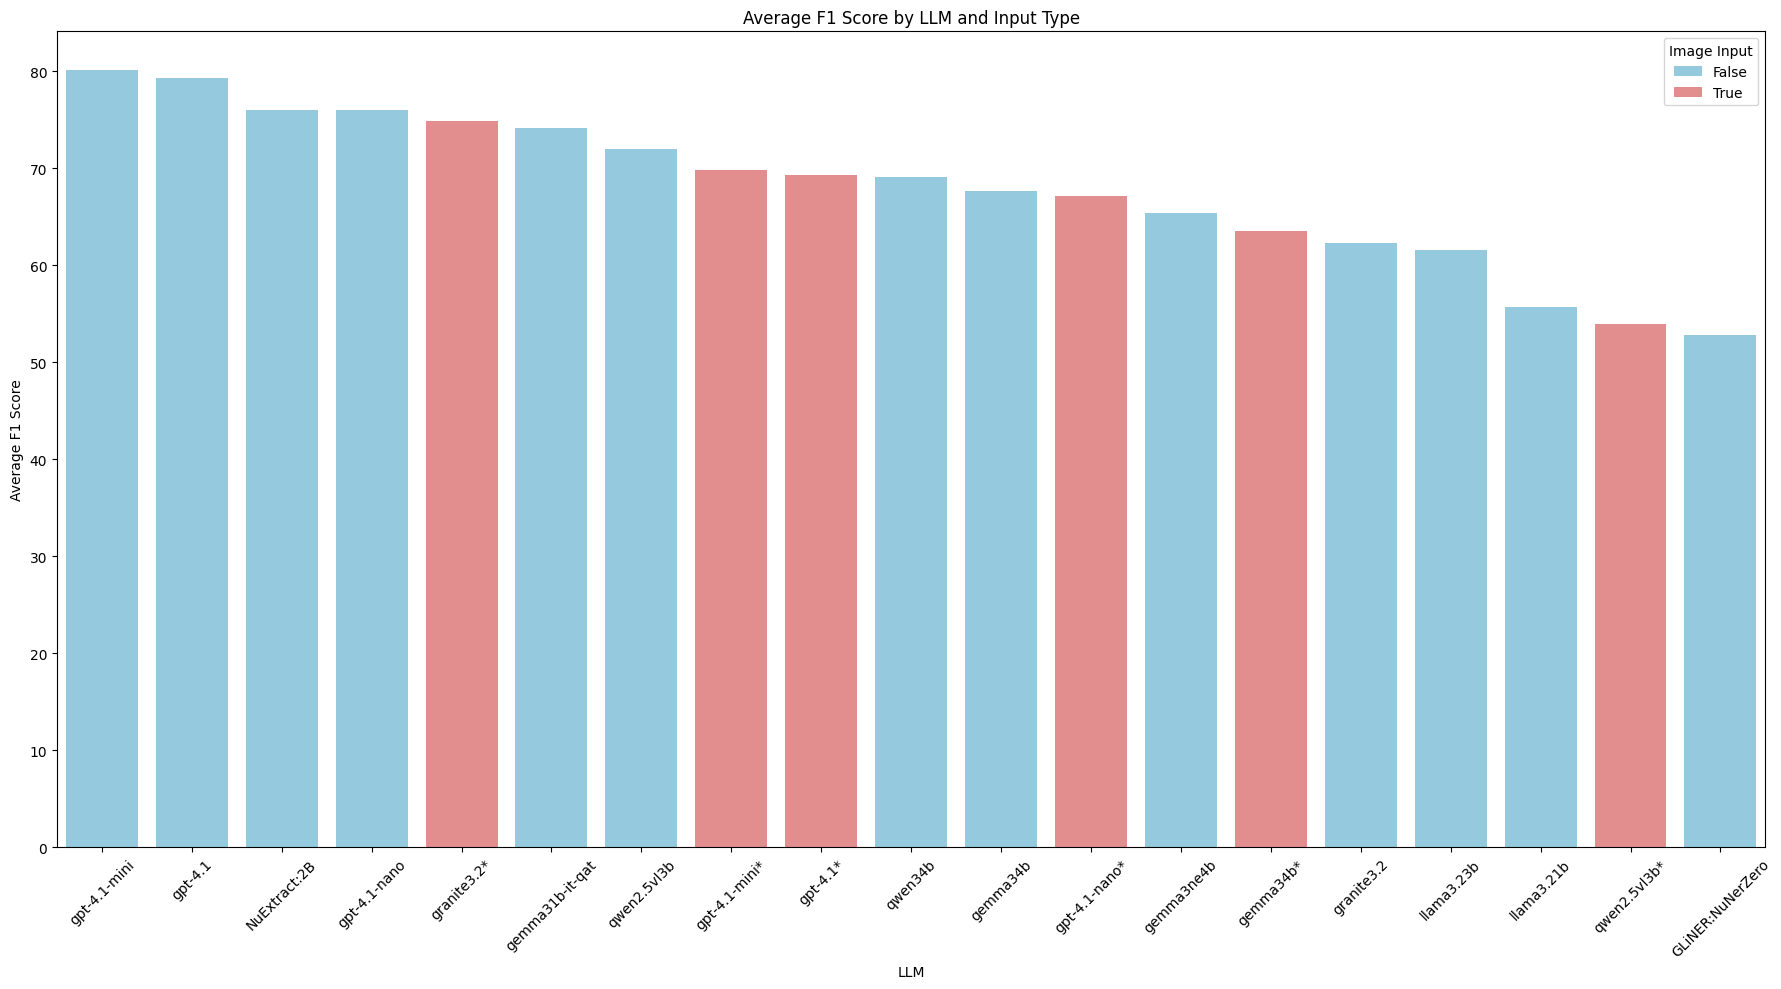

In [221]:
colors = ['skyblue', 'lightcoral']
plt.figure(figsize=(18, 10))
sns.barplot(x=inputType.index.get_level_values(0), y=inputType.values, hue=inputType.index.get_level_values(1), palette=colors)
plt.title('Average F1 Score by LLM and Input Type')
plt.xlabel('LLM')
plt.ylabel('Average F1 Score')
plt.xticks(rotation=45)
plt.legend(title='Image Input', loc='upper right')
plt.tight_layout()
plt.show()